# (Разведочный анализ данных) Exploratory data analisys


- AREA_TYPE : тип района, где расположен объект недвижимости.
- AVAILABILITY : доступна ли недвижимость в настоящее время или нет.
- LOCATION : Место, где находится недвижимость.
- SIZE : Количество спален
- SOCIETY : Тип района, в котором находится собственность.
- TOTAL_SQFT : общая площадь объекта в квадратных футах.
- BATH : Количество ванных комнат
- BALCONY : Количество балконов
- PRICE : Стоимость недвижимости в лакхах¶

В качестве задания вам предлагается повторить данные действия для набора данных
- [Somerville Happiness Survey Data Set](http://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey)

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import StandardScaler

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/yakushinav/omo/main/data/Bengaluru_House_Data.csv')
print(df.head())

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society  total_sqft  bath  balcony   price  
0  Coomee       1056.0   2.0      1.0   39.07  
1  Theanmp      2600.0   5.0      3.0  120.00  
2      NaN      1440.0   2.0      3.0   62.00  
3  Soiewre      1521.0   3.0      1.0   95.00  
4      NaN      1200.0   2.0      1.0   51.00  


In [16]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [17]:
len(df.columns)

9

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13317 entries, 0 to 13316
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13287 non-null  object 
 1   availability  13287 non-null  object 
 2   location      13286 non-null  object 
 3   size          13271 non-null  object 
 4   society       7807 non-null   object 
 5   total_sqft    13287 non-null  float64
 6   bath          13214 non-null  float64
 7   balcony       12679 non-null  float64
 8   price         13287 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.5+ KB


# Смотрим на каждый признак в отдельности

## Что нас интересует?
- Тип (числовая / категориальная)
- Смысл
- Влияние на целевую переменную

В итоге анализа делаем __вывод__.

## Целевая переменная

In [19]:
df['price'].describe()

,price
count,13287.000000
mean,112.463371
std,149.025292
min,8.000000
25%,50.000000
50%,72.000000
75%,120.000000
max,3600.000000


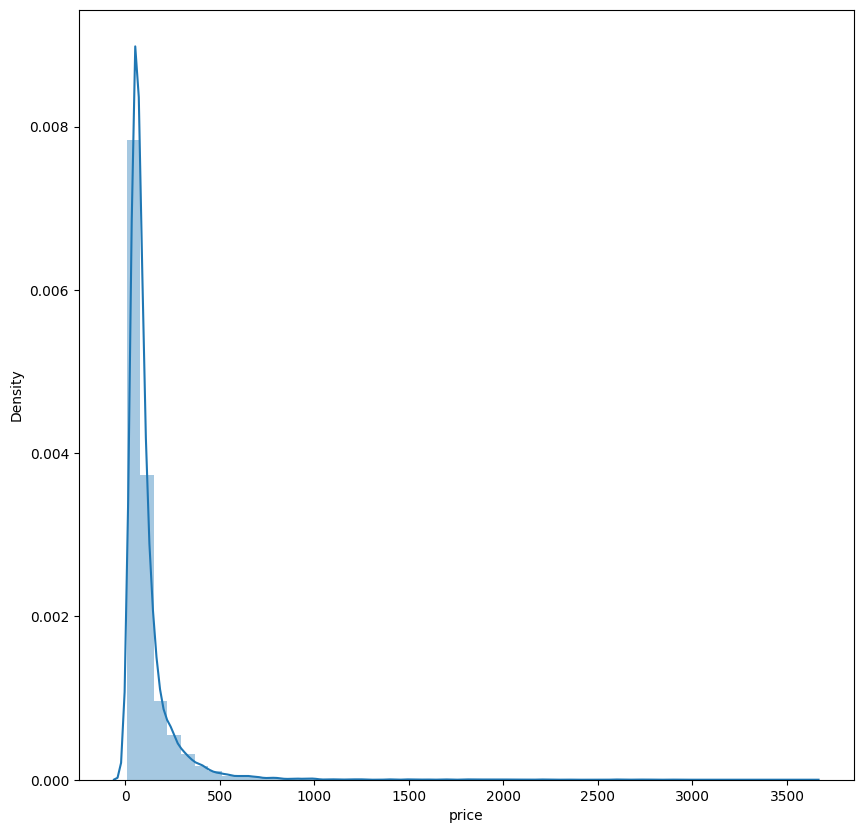

In [34]:
sns.distplot(df['price']);

In [35]:
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 8.074718
Kurtosis: 108.296867


- Распределение отличается от нормального
- Коэффициент асимметрии > 0
- Коэффициент эксцесса (островершинности)  — мера остроты пика распределения случайной величины


## 1 Анализ пропущенных значений

In [41]:
df.isnull().sum()

,0
area_type,30
availability,30
location,31
size,46
society,5510
total_sqft,30
bath,103
balcony,638
price,30


<Axes: >

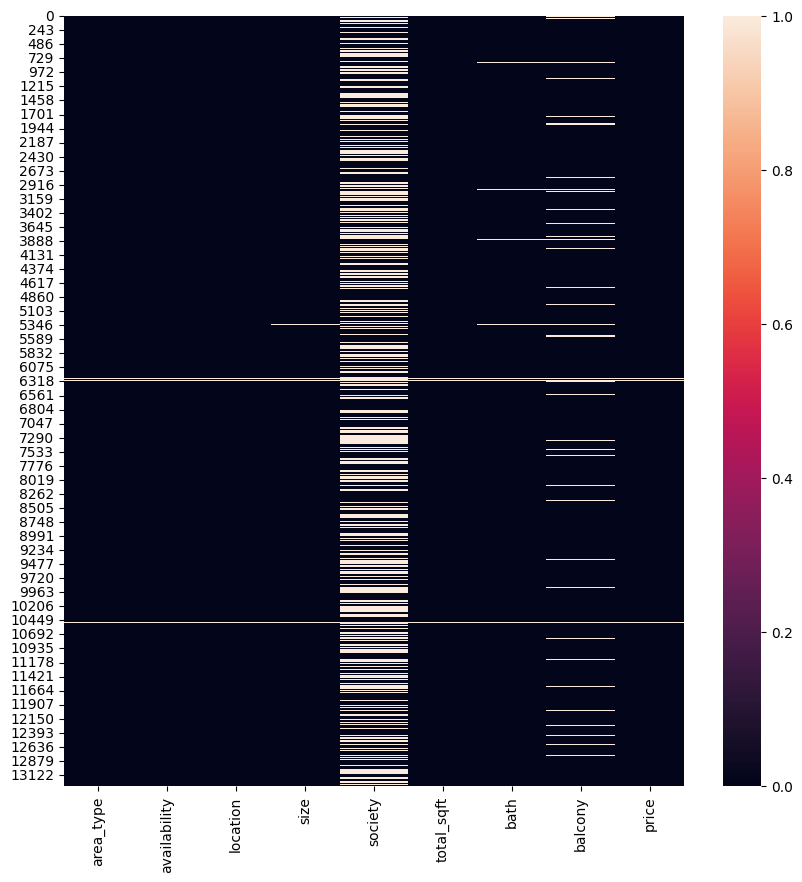

In [42]:
sns.heatmap(df.isnull())

In [45]:
(df.isnull().sum()/len(df))*100

,0
area_type,0.225276
availability,0.225276
location,0.232785
size,0.345423
society,41.375685
total_sqft,0.225276
bath,0.773447
balcony,4.790869
price,0.225276


## Категориальные переменные

In [48]:
#40% данных в поле society пропущено. Удаляем
df.drop('society',axis=1,inplace=True)

In [49]:
#Заменяем пропущенные значения на моду
df.location.replace(to_replace=np.nan,value=df.location.mode()[0],inplace=True)
df.area_type.replace(to_replace=np.nan,value=df.area_type.mode()[0],inplace=True)

In [50]:
#Поле size содержит данные такого вида 2 BHK. Выделим число отдельно
df['size']=df['size'].str.split(' ',expand=True)[0].astype(np.number)
df.bath=df.bath.astype(np.number)
print(df.head())

              area_type   availability                  location  size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II   2.0   
1            Plot  Area  Ready To Move          Chikka Tirupathi   4.0   
2        Built-up  Area  Ready To Move               Uttarahalli   3.0   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli   3.0   
4  Super built-up  Area  Ready To Move                  Kothanur   2.0   

   total_sqft  bath  balcony   price  
0      1056.0   2.0      1.0   39.07  
1      2600.0   5.0      3.0  120.00  
2      1440.0   2.0      3.0   62.00  
3      1521.0   3.0      1.0   95.00  
4      1200.0   2.0      1.0   51.00  


/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [51]:
#Заменим на бинарный признак доступно/недоступно
df.availability=(df.availability=='Ready To Move')
df.availability.replace({True:1,False:0},inplace=True)
df.availability=df.availability.astype(object)
df.availability.head()

,availability
0,0
1,1
2,1
3,1
4,1


In [52]:
df.isnull().sum()

,0
area_type,0
availability,0
location,0
size,46
total_sqft,30
bath,103
balcony,638
price,30


## Числовые переменные

In [54]:
#Заменяем пропуски в данных на конкретное значение
df.bath=df.bath.astype(np.number)
df['bath'] = df['bath'].fillna(1)
df.balcony = df.balcony.astype(np.number)
df['balcony'] = df['balcony'].fillna(0)
#df.size=df.size.astype(np.number)
df['size'] = df['size'].fillna(1)

/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [55]:
#Заменяем пропуски в данных на основе интерполяции
df['total_sqft'] = df['total_sqft'].interpolate(method='polynomial', order=2)
df['price'] = df['price'].interpolate(method='polynomial', order=2)

<Axes: >

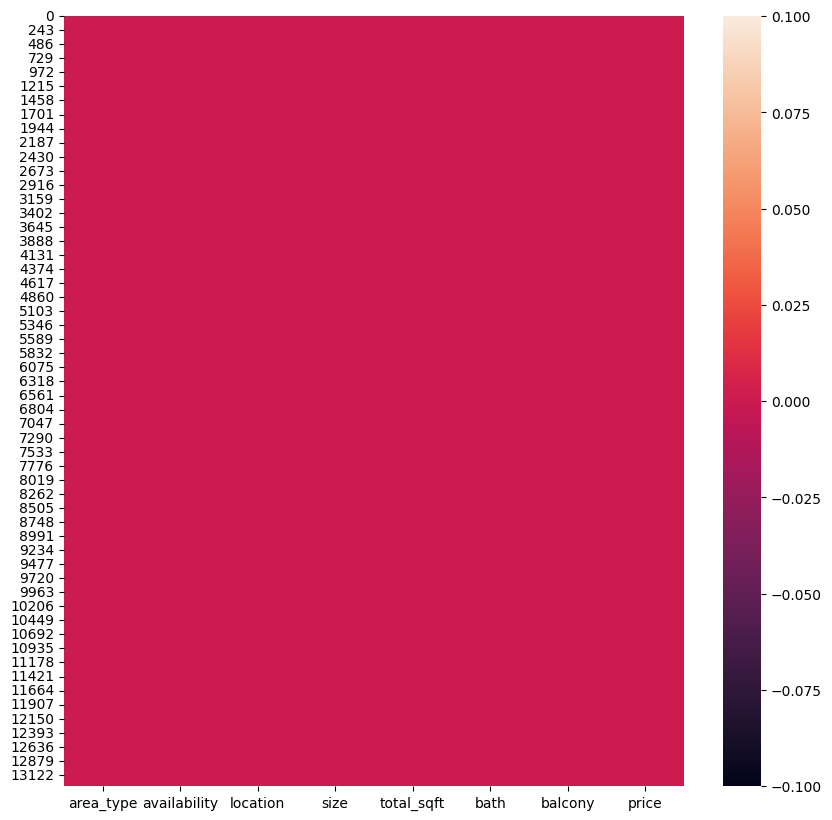

In [56]:
sns.heatmap(df.isnull())

In [57]:
(df.isnull().sum()/len(df))*100

,0
area_type,0.0
availability,0.0
location,0.0
size,0.0
total_sqft,0.0
bath,0.0
balcony,0.0
price,0.0


## 2 Удаление выбросов

<Axes: >

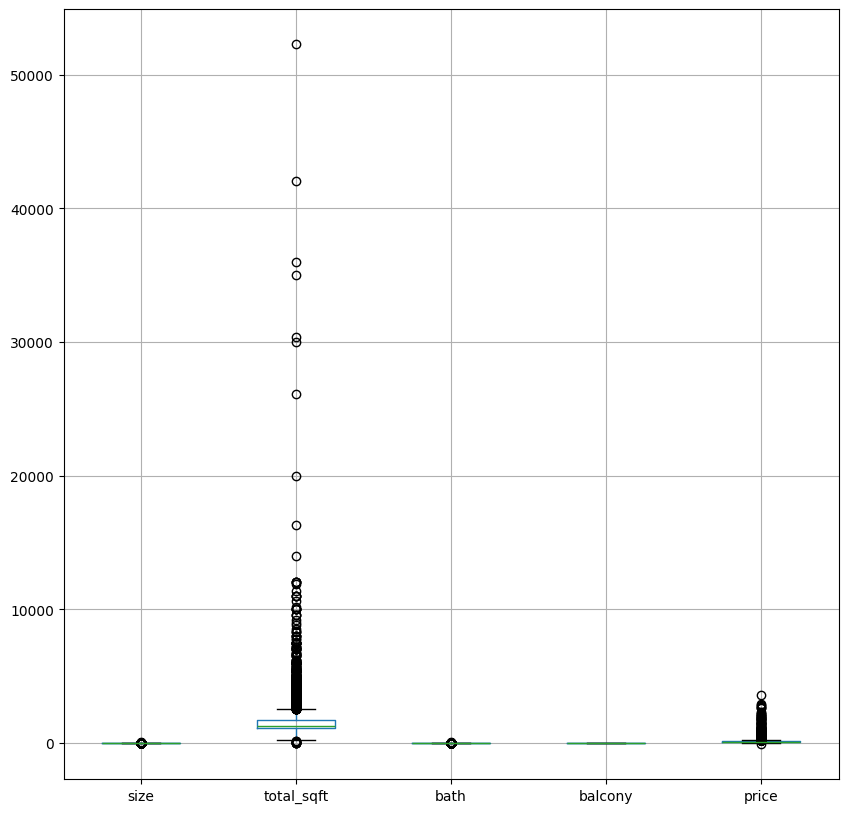

In [58]:
df.boxplot()

In [59]:
# Удалим выбросы, которые выходят далеко за 1 и 3 квартили
q1 = df.quantile(0.25,numeric_only=True)
q3 = df.quantile(0.75,numeric_only=True)
# Межквартильное расстояние
IQR = q3-q1
print("q1= ",q1)
print("q3= ",q3)
print("IQR= ",IQR)
#Верхняя и нижняя граница
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR
print(lower,upper)

q1=  size             2.0
total_sqft    1100.0
bath             2.0
balcony          1.0
price           50.0
Name: 0.25, dtype: float64
q3=  size             3.0
total_sqft    1680.0
bath             3.0
balcony          2.0
price          120.0
Name: 0.75, dtype: float64
IQR=  size            1.0
total_sqft    580.0
bath            1.0
balcony         1.0
price          70.0
dtype: float64
size            0.5
total_sqft    230.0
bath            0.5
balcony        -0.5
price         -55.0
dtype: float64 size             4.5
total_sqft    2550.0
bath             4.5
balcony          3.5
price          225.0
dtype: float64


In [60]:
print("Old Shape: ", df.shape)
# Создадим массивы булевых значений, указывающих на строки-выбросы
upper_array = np.where(df.select_dtypes(np.number) >= upper)[0]
lower_array = np.where(df.select_dtypes(np.number) <= lower)[0]
# Возможно в оба массива попадут одинаковые строки. Уберем из lower их пересечение
lower_array = np.setdiff1d(lower_array, upper_array)

# Удалим выбросы
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

print("New Shape: ", df.shape)

Old Shape:  (13317, 8)
New Shape:  (11092, 8)


<Axes: >

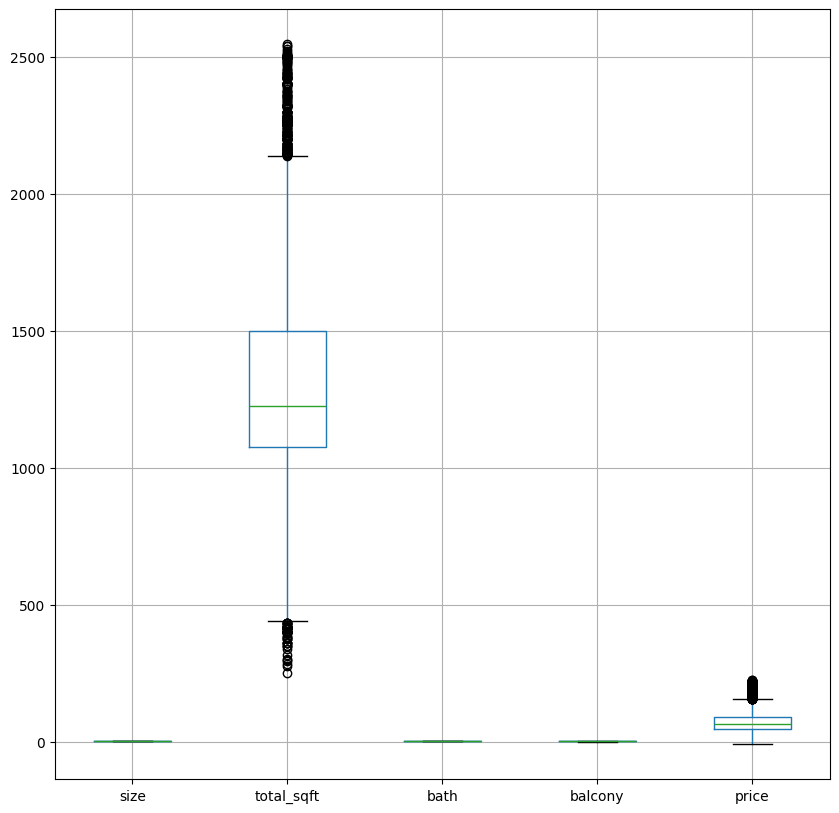

In [61]:
df.boxplot()

In [62]:
df.shape

(11092, 8)

## 3. Разведочный анализ

<Axes: ylabel='price'>

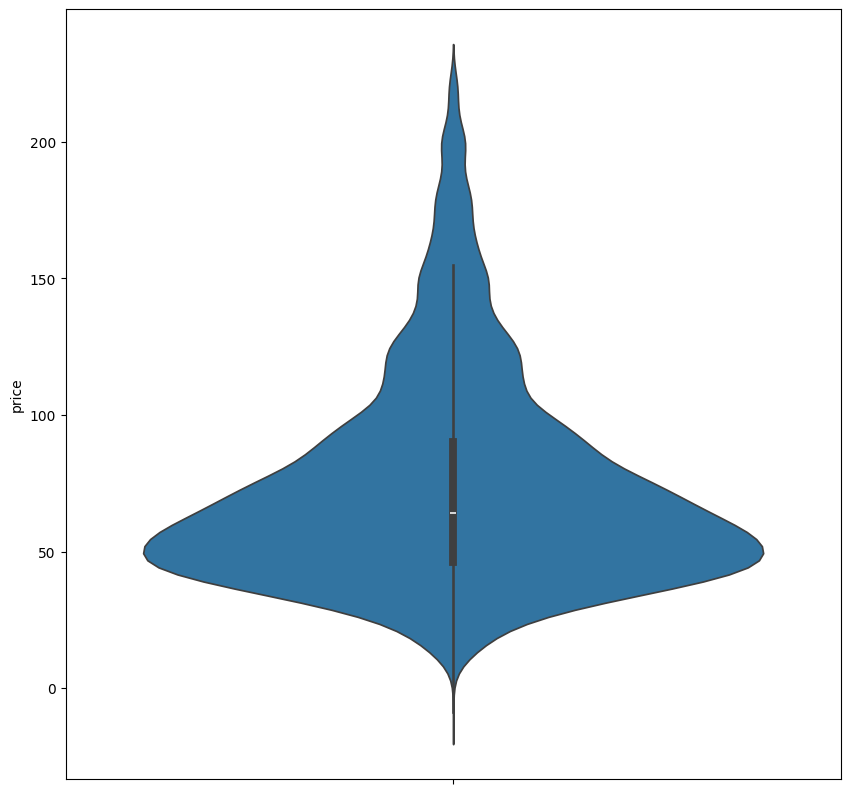

In [63]:
sns.violinplot(y = df.price)

Text(0, 0.5, 'Доступность')

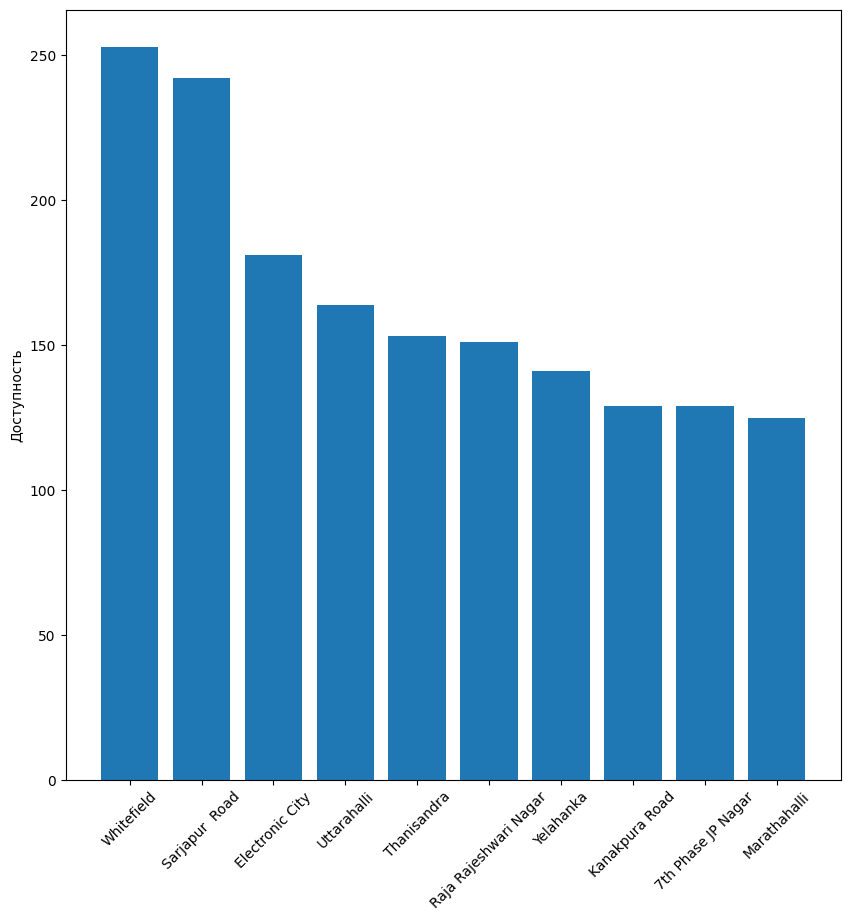

In [64]:
# Распределение недвижимости по доступности и локации
plt.bar(x=df[df['availability'] == 1].groupby('location')['availability'].agg('count').sort_values(ascending=False).head(10).index,height=df[df['availability'] == 1].groupby('location')['availability'].agg('count').sort_values(ascending=False).head(10))
plt.xticks(rotation=45)
plt.ylabel('Доступность')

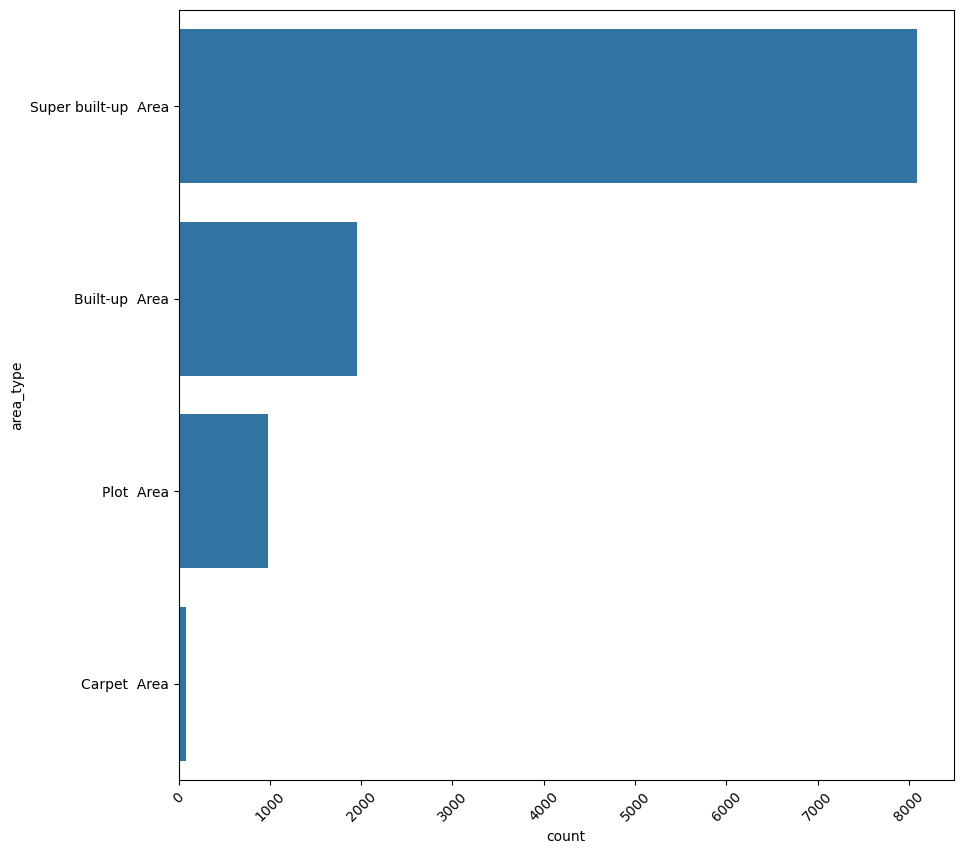

In [65]:
# Распределение данных по типу недвижимости
sns.countplot(df.area_type)
plt.xticks(rotation = 45)
plt.show()

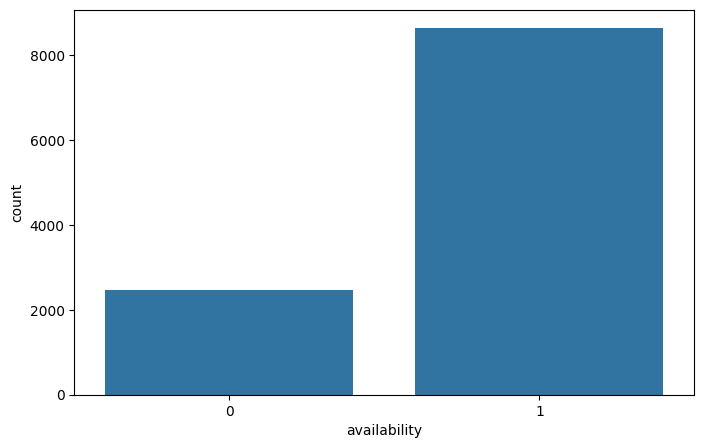

In [66]:
# Распределение по доступности
plt.figure(figsize=(8,5))
sns.countplot(df, x='availability')
plt.show()

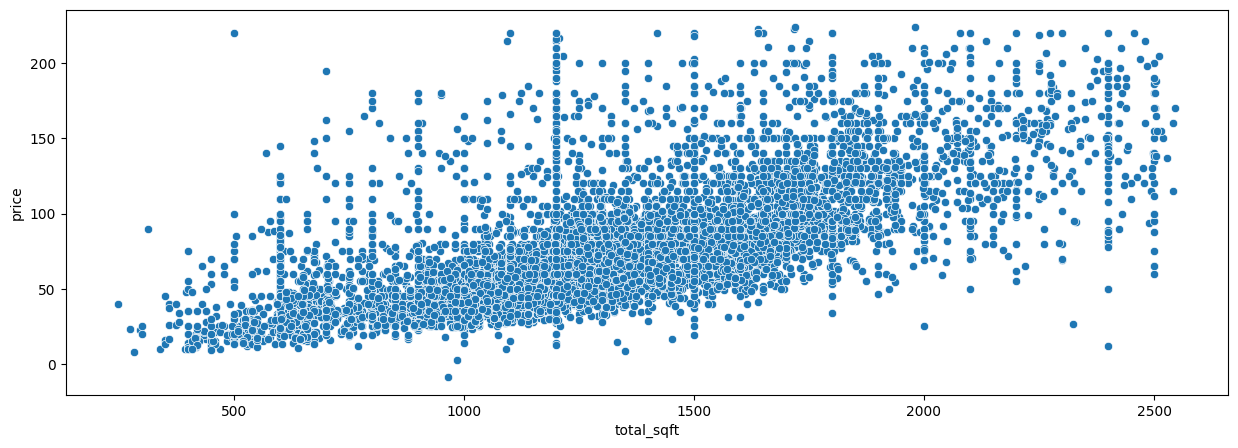

In [67]:
# Зависимость цены от площади
plt.figure(figsize=(15,5))
sns.scatterplot(x="total_sqft", y="price", data=df)
plt.show()

Text(0.5, 0, 'Количество спален')

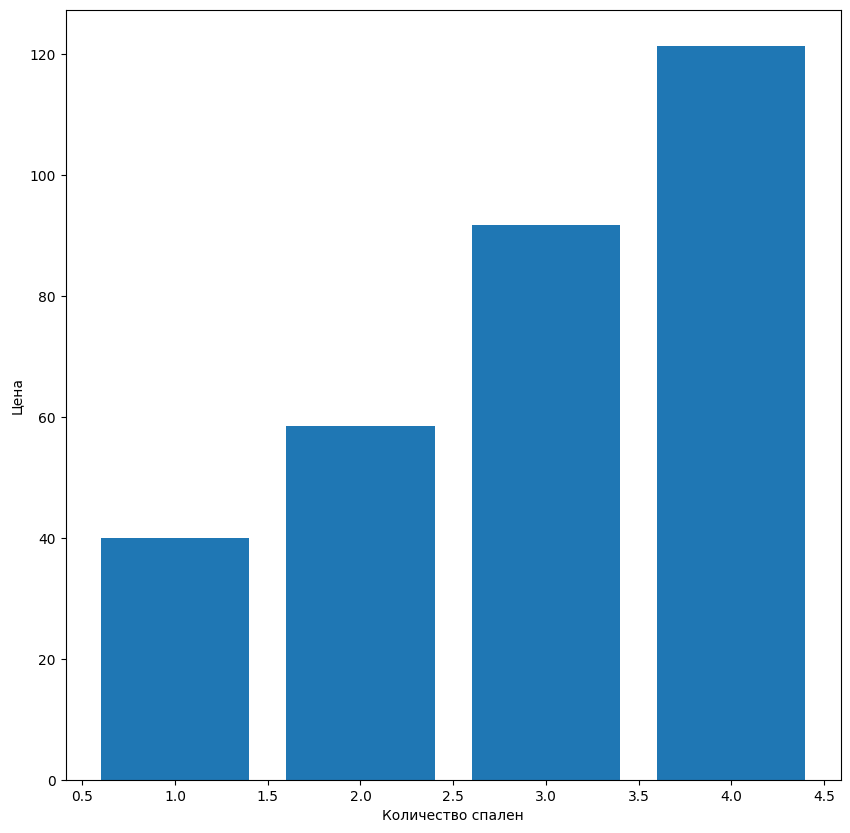

In [68]:
# Распределение по количеству спален
df10 = df.copy()
df10['size'] = np.round(df10['size'])
plt.bar(x=df10.groupby('size')['price'].agg('mean').sort_values(ascending=False).head(10).index,height=df10.groupby('size')['price'].agg('mean').sort_values(ascending=False).head(10))
plt.ylabel('Цена')
plt.xlabel('Количество спален')

# Самые дорогие районы в Бангалоре

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Brigade Road'),
  Text(1, 0, 'Ramaswamy Palya - Kammanahalli Main Road'),
  Text(2, 0, 'frazertown'),
  Text(3, 0, 'Postal Colony'),
  Text(4, 0, 'Near ullas theater'),
  Text(5, 0, '2nd phase jp nagar, jp nagar'),
  Text(6, 0, 'Dairy Circle'),
  Text(7, 0, 'M.G Road'),
  Text(8, 0, 'CR Layout'),
  Text(9, 0, '12th cross srinivas nagar banshankari 3rd stage')])

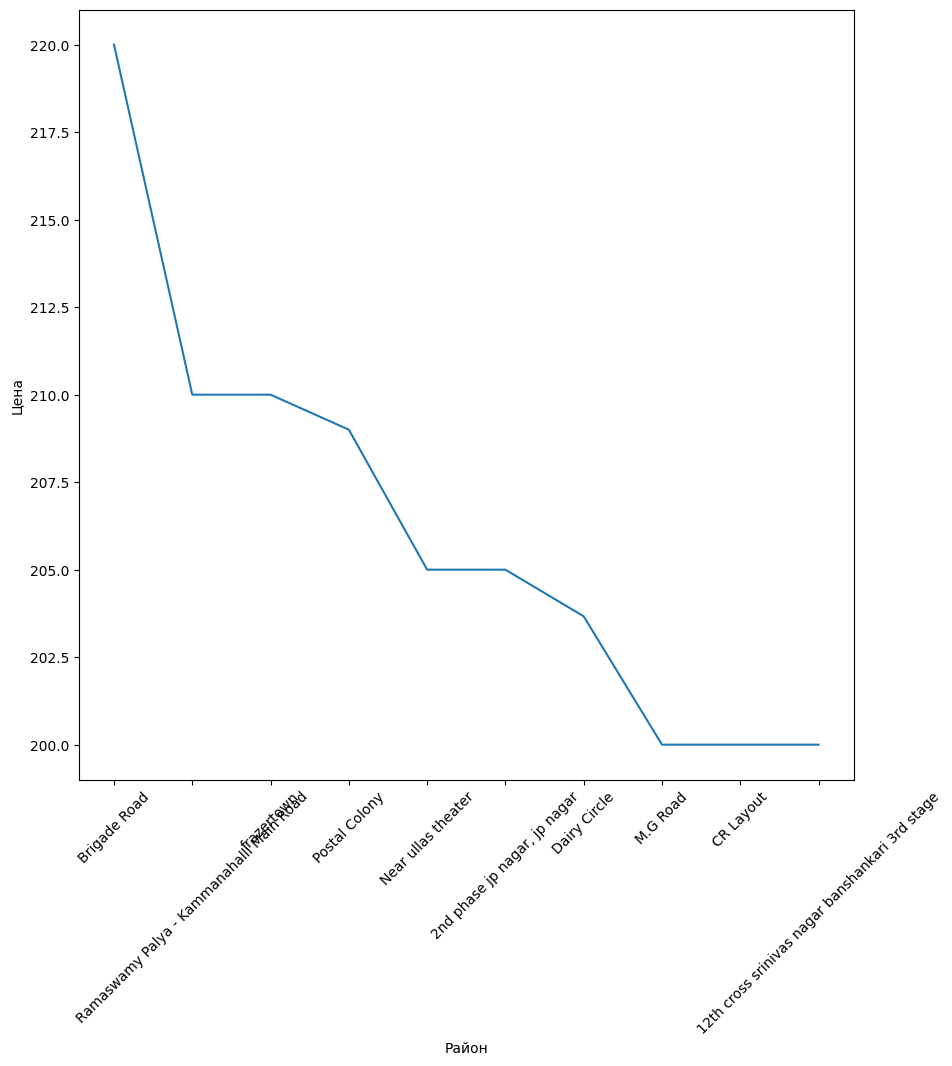

In [69]:
plt.plot(df.groupby(by='location')['price'].agg('mean').sort_values(ascending=False).head(10))
plt.xlabel('Район')
plt.ylabel('Цена')
plt.xticks(rotation=45)

# Самые дорогие районы в Бангалоре по отношению цена/площадь

In [70]:
df['per_sqft'] = df['price']/df['total_sqft']

Text(0, 0.5, 'Average Price / Sq.ft in Lakhs')

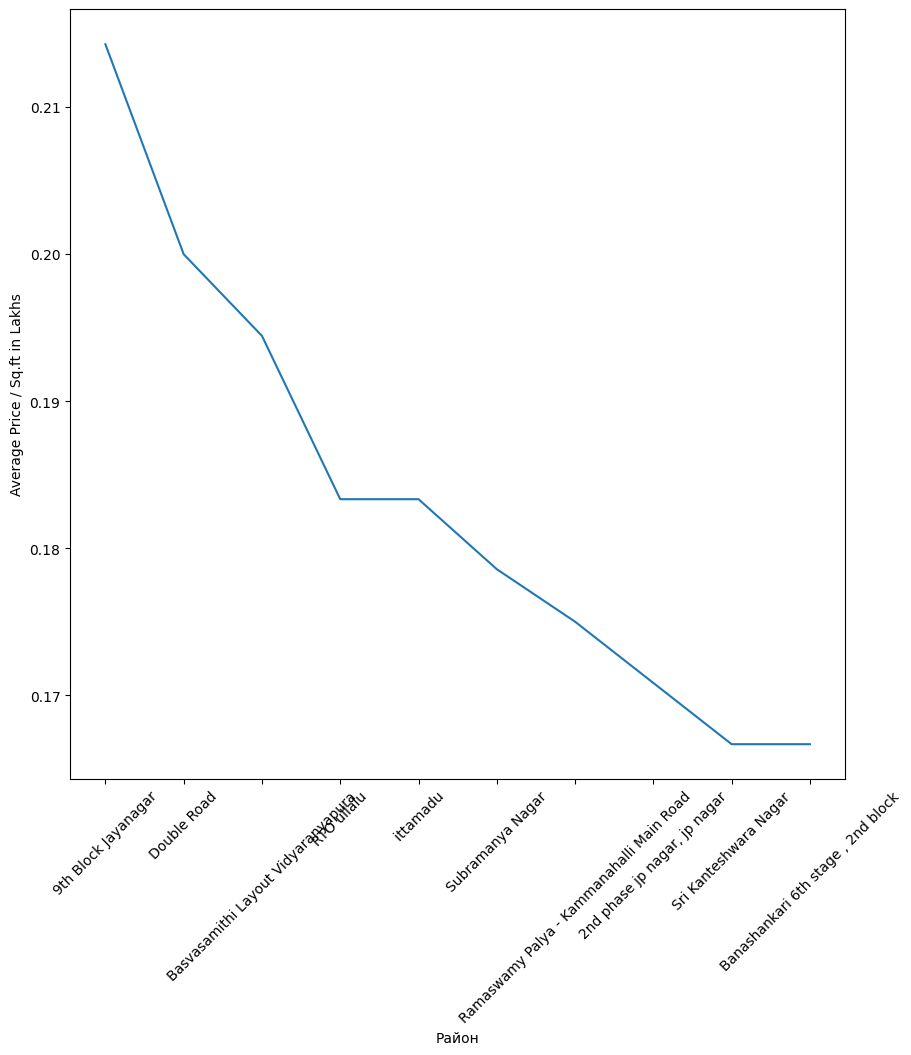

In [71]:
plt.plot(df.groupby(by='location')['per_sqft'].agg('mean').sort_values(ascending=False).head(10))
plt.xticks(rotation = 45)
plt.xlabel('Район')
plt.ylabel('Average Price / Sq.ft in Lakhs')

In [72]:
df = df.drop('per_sqft',axis=1)

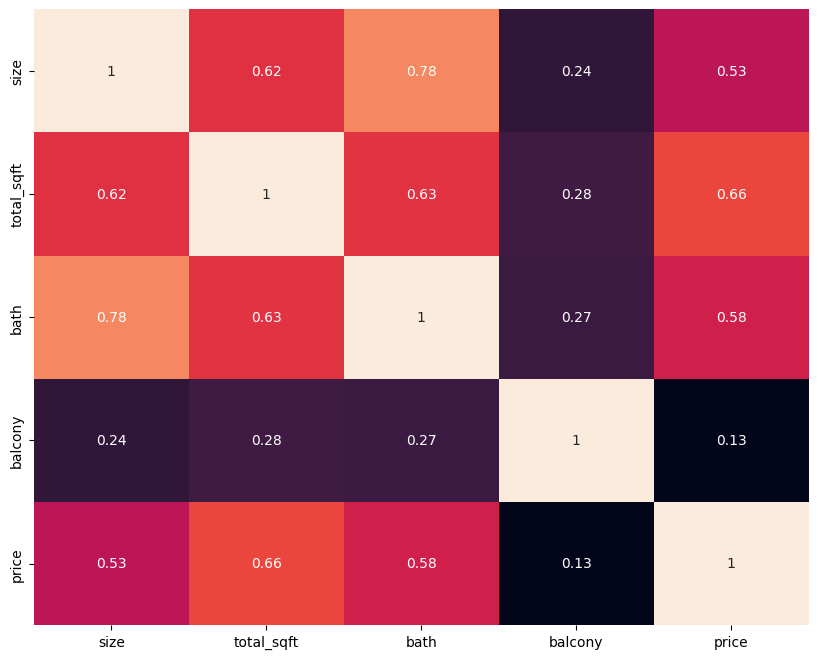

In [73]:
# Тепловая карта
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cbar=False)
plt.show()

## Стандартизация

In [74]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
2,Built-up Area,1,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2.0,1200.0,2.0,1.0,51.00
5,Super built-up Area,1,Whitefield,2.0,1170.0,2.0,1.0,38.00


In [75]:
# Выдлим категориальные и числовые признаки
data_cat=df.select_dtypes(exclude=np.number)
data_num=df.select_dtypes(np.number)
data_cat=data_cat.reset_index()

In [76]:
# Стандартизация это перевод к виду Среднее значение = 0, стандартное отклонение = 1
ss=StandardScaler()
data_num_scaled=pd.DataFrame(ss.fit_transform(data_num),columns=data_num.columns)
data_num_scaled=data_num_scaled.reset_index()
data_num_scaled.head()

,index,size,total_sqft,bath,balcony,price
0,0,-0.635411,-0.626550,-0.421815,-0.633734,-0.904429
1,1,0.844324,0.387469,-0.421815,1.840529,-0.301671
2,2,0.844324,0.601364,1.072524,-0.633734,0.565796
3,3,-0.635411,-0.246293,-0.421815,-0.633734,-0.590827
4,4,-0.635411,-0.325513,-0.421815,-0.633734,-0.932556


In [77]:
# Соединяем данные
df=pd.concat([data_num_scaled,data_cat],axis=1).drop('index',axis=1)
df.head()

,size,total_sqft,bath,balcony,price,area_type,availability,location
0,-0.635411,-0.626550,-0.421815,-0.633734,-0.904429,Super built-up Area,0,Electronic City Phase II
1,0.844324,0.387469,-0.421815,1.840529,-0.301671,Built-up Area,1,Uttarahalli
2,0.844324,0.601364,1.072524,-0.633734,0.565796,Super built-up Area,1,Lingadheeranahalli
3,-0.635411,-0.246293,-0.421815,-0.633734,-0.590827,Super built-up Area,1,Kothanur
4,-0.635411,-0.325513,-0.421815,-0.633734,-0.932556,Super built-up Area,1,Whitefield


# Далее заменяем категориальные данные на числовые коды

In [79]:
# Заменим категориальные данные на числовые коды из словаря
encoder = LabelEncoder()
df['location'] = encoder.fit_transform(df['location'])
df['location'] = df['location'].astype(np.number)

df['availability'] = encoder.fit_transform(df['availability'])

/usr/local/lib/python3.11/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [80]:
# Заменим категориальные данные на бинарные поля
df=pd.get_dummies(df,columns=['area_type'])
df.head()

,size,total_sqft,bath,balcony,price,availability,location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,-0.635411,-0.626550,-0.421815,-0.633734,-0.904429,0,352.0,False,False,False,True
1,0.844324,0.387469,-0.421815,1.840529,-0.301671,1,1003.0,True,False,False,False
2,0.844324,0.601364,1.072524,-0.633734,0.565796,1,647.0,False,False,False,True
3,-0.635411,-0.246293,-0.421815,-0.633734,-0.590827,1,613.0,False,False,False,True
4,-0.635411,-0.325513,-0.421815,-0.633734,-0.932556,1,1064.0,False,False,False,True


In [81]:
print(df.head())

       size  total_sqft      bath   balcony     price  availability  location  \
0 -0.635411   -0.626550 -0.421815 -0.633734 -0.904429             0     352.0   
1  0.844324    0.387469 -0.421815  1.840529 -0.301671             1    1003.0   
2  0.844324    0.601364  1.072524 -0.633734  0.565796             1     647.0   
3 -0.635411   -0.246293 -0.421815 -0.633734 -0.590827             1     613.0   
4 -0.635411   -0.325513 -0.421815 -0.633734 -0.932556             1    1064.0   

   area_type_Built-up  Area  area_type_Carpet  Area  area_type_Plot  Area  \
0                     False                   False                 False   
1                      True                   False                 False   
2                     False                   False                 False   
3                     False                   False                 False   
4                     False                   False                 False   

   area_type_Super built-up  Area  
0             

**(Разведочный анализ данных) Exploratory data analisys:**

Повтор действий для набора данных Somerville Happiness Survey Data Set

**Обученные модели для прогнозирования уровня счастья на основе категориальных признаков**

Для этого проекта был выбран набор данных *Somerville Happiness Survey*, собранный в 2015 году путем опроса 143 жителей Сомервилля об их личном уровне счастья и удовлетворенности городскими услугами. Набор включает 6 признаков (X1–X6) со значениями от 1 до 5 и бинарный целевой атрибут:  

- **D** = целевой атрибут (D) со значениями 0 (несчастлив) и 1 (счастлив);  
- **X1** = доступность информации о городских услугах;  
- **X2** = стоимость жилья;  
- **X3** = общее качество государственных школ;  
- **X4** = доверие к местной полиции;  
- **X5** = состояние дорог и тротуаров;  
- **X6** = доступность мероприятий для местного сообщества.  

**1. Общее описание данных**

Размер датасета: 143 наблюдения, 7 признаков (6 категориальных + 1 бинарный целевой).

Типы признаков:
* Все признаки (X1–X6) — порядковые (ординальные) категориальные (шкала 1–5).
* Целевая переменная (D) — бинарная (0 = несчастлив, 1 = счастлив).
* В данных отсутствуют пропущенные значения, поэтому дополнительная обработка не требуется.  

In [92]:
pip install seaborn

In [20]:
data = pd.read_csv('https://raw.githubusercontent.com/farnazgh/Somerville-Happiness-Survey/refs/heads/master/data/SomervilleHappinessSurvey2015.csv')
print(data.head())

   D  X1  X2  X3  X4  X5  X6
0  0   3   3   3   4   2   4
1  0   3   2   3   5   4   3
2  1   5   3   3   3   3   5
3  0   5   4   3   3   3   5
4  0   5   4   3   3   3   5


In [21]:
data.columns

Index(['D', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [22]:
len(data.columns)

7

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   D       143 non-null    int64
 1   X1      143 non-null    int64
 2   X2      143 non-null    int64
 3   X3      143 non-null    int64
 4   X4      143 non-null    int64
 5   X5      143 non-null    int64
 6   X6      143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


In [24]:
data.describe()

,D,X1,X2,X3,X4,X5,X6
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.538462,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783
std,0.500271,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [40]:
data.isnull().sum()

,0
D,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0


<Axes: >

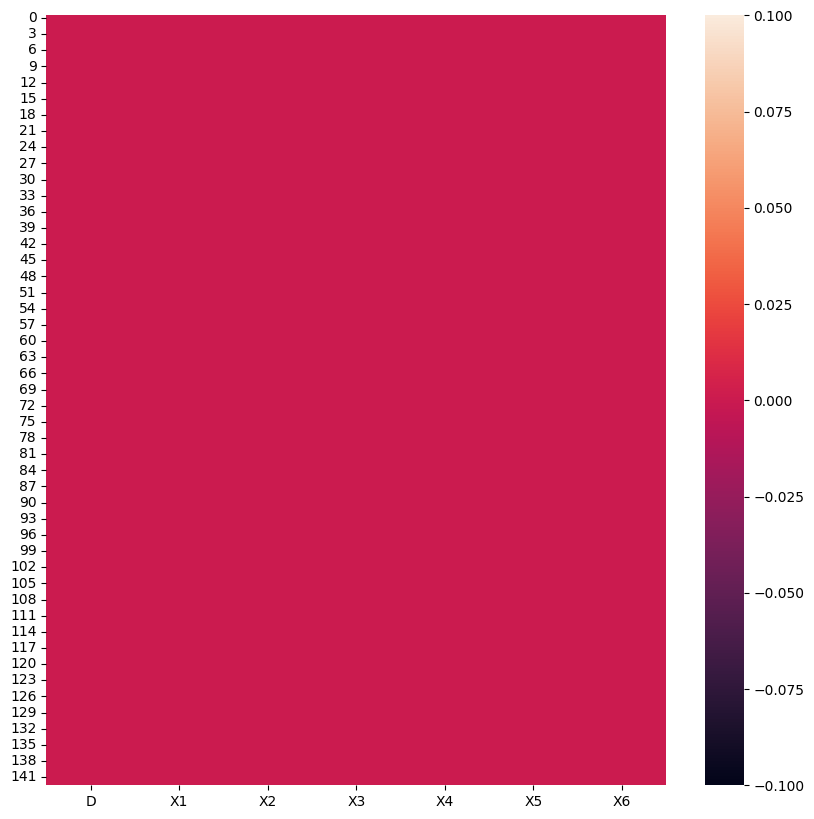

In [44]:
sns.heatmap(data.isnull())

In [47]:
(data.isnull().sum()/len(data))*100

,0
D,0.0
X1,0.0
X2,0.0
X3,0.0
X4,0.0
X5,0.0
X6,0.0


**2. Распределение целевой переменной (D)**

Необходимо проверить баланс классов:

* Если распределение сильно неравномерное (например, 90% счастливых и 10% несчастливых), это может повлиять на выбор метрик (точность, F1-score, AUC-ROC).
* В случае дисбаланса может потребоваться стратифицированная выборка или методы балансировки (oversampling, undersampling).

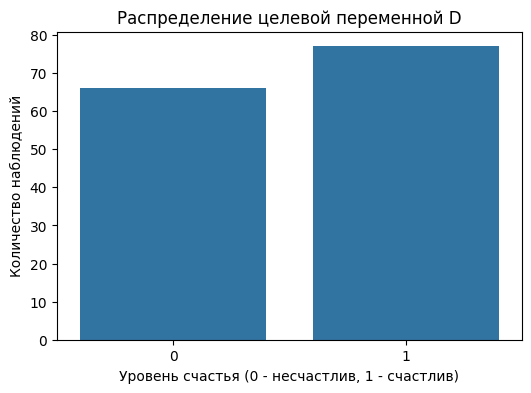

D
1    53.846154
0    46.153846
Name: proportion, dtype: float64


In [89]:
# Распределение классов D
plt.figure(figsize=(6, 4))
sns.countplot(x='D', data=data)
plt.title("Распределение целевой переменной D")
plt.xlabel("Уровень счастья (0 - несчастлив, 1 - счастлив)")
plt.ylabel("Количество наблюдений")
plt.show()

# Процентное соотношение
print(data['D'].value_counts(normalize=True) * 100)

# Баланс классов допуститм, методы балансировки не требуются.

**3. Распределение признаков (X1–X6)**

* X2 (стоимость жилья) имеет пик на 2–3, то есть жители считают жилье дорогим.
* X4 (полиция) имеет пик на 4, доверие к полиции высокое.

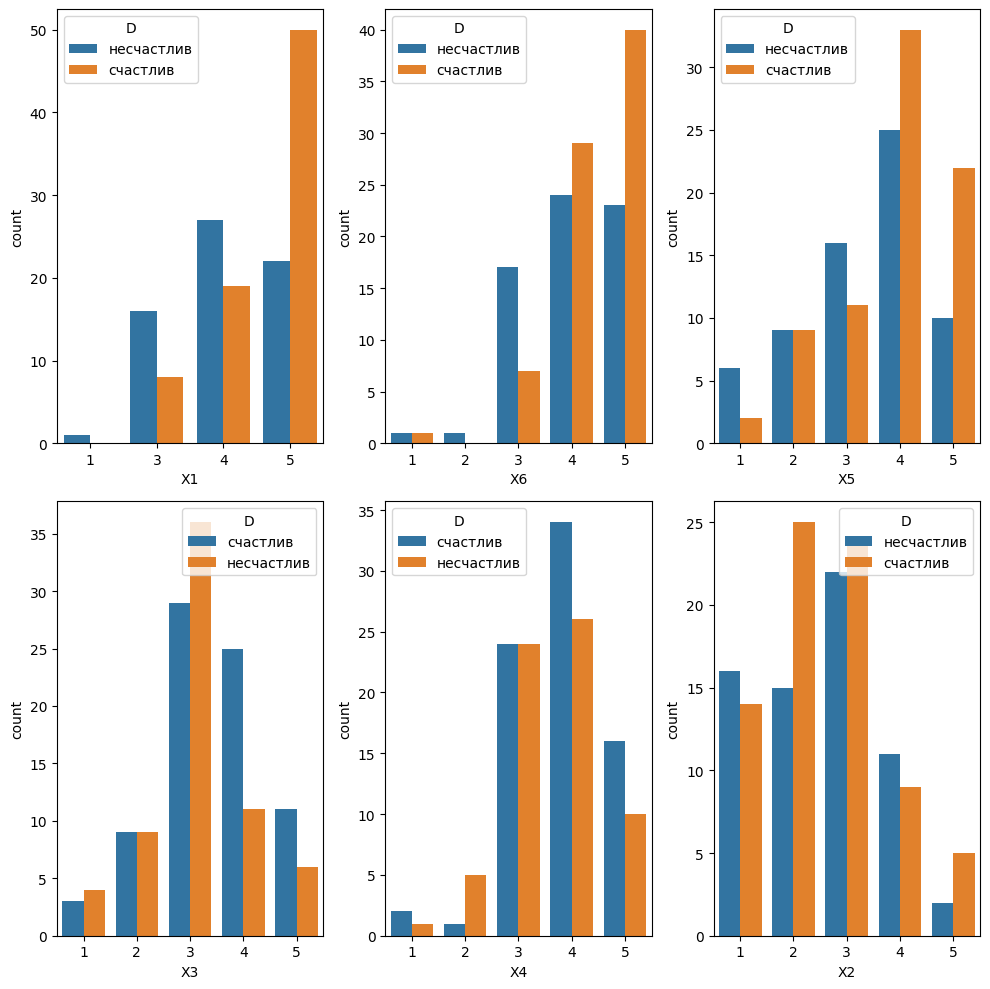

In [33]:
import math
from matplotlib import rcParams
import numpy as np

# figure size in inches
rcParams['figure.figsize'] = 10,10

def plot_multiple_countplots(data, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)

    fig, axs = plt.subplots(num_rows, num_cols)

 # Создаем копию данных с замененными значениями в колонке D для легенды
    data_legend = data.copy()
    data_legend['D'] = data_legend['D'].map({0: 'несчастлив', 1: 'счастлив'})

    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols

        if num_rows == 1:
            if num_cols == 1:
                plot = sns.countplot(x=data[col], hue=data_legend["D"], ax=axs)
                # Убираем старую легенду и добавляем новую
                axs.legend(title='D')
            else:
                plot = sns.countplot(x=data[col], hue=data_legend["D"], ax=axs[j])
                axs[j].legend(title='D')
        else:
            plot = sns.countplot(x=data[col], hue=data_legend["D"], ax=axs[i, j])
            axs[i, j].legend(title='D')

    # Убираем пустые subplots, если они есть
    for ind in range(len(cols), num_rows * num_cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        if num_rows == 1:
            if num_cols == 1:
                axs.set_visible(False)
            else:
                axs[j].set_visible(False)
        else:
            axs[i, j].set_visible(False)

    plt.tight_layout()

# Пример вызова функции
plot_multiple_countplots(data, cor_target.keys())

In [82]:
class_data = data['D']
class_data.head()

,D
0,0
1,0
2,1
3,0
4,0


In [84]:
features_data=data.drop('D',axis=1)
features_data.head()

,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5


In [85]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_data, class_data, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(114, 6)
(29, 6)
(114,)
(29,)


**4. Корреляции и взаимосвязи**

* Значения близкие к +1/-1 указывают на сильную связь.
* Например, если D сильно коррелирует с X4, то доверие к полиции важно для счастья.

In [91]:
# Корреляция с выходной переменной
cor_target = abs(cor['D']).sort_values(ascending=False)[1:]

cor_target

,D
X1,0.312740
X6,0.220729
X5,0.206685
X3,0.163639
X4,0.113356
X2,0.019368


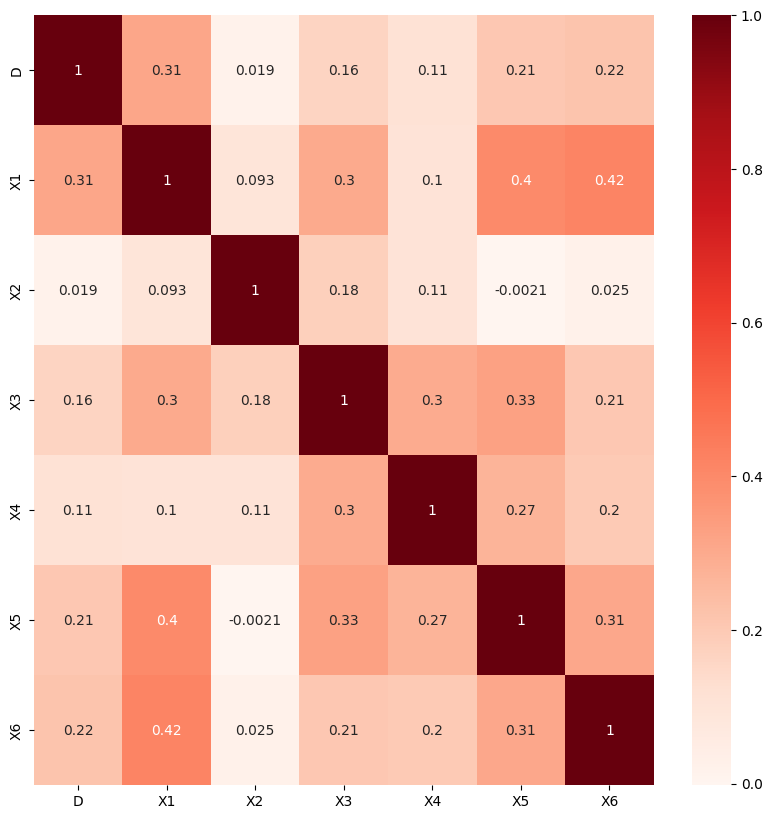

In [90]:
#Using Pearson Correlation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

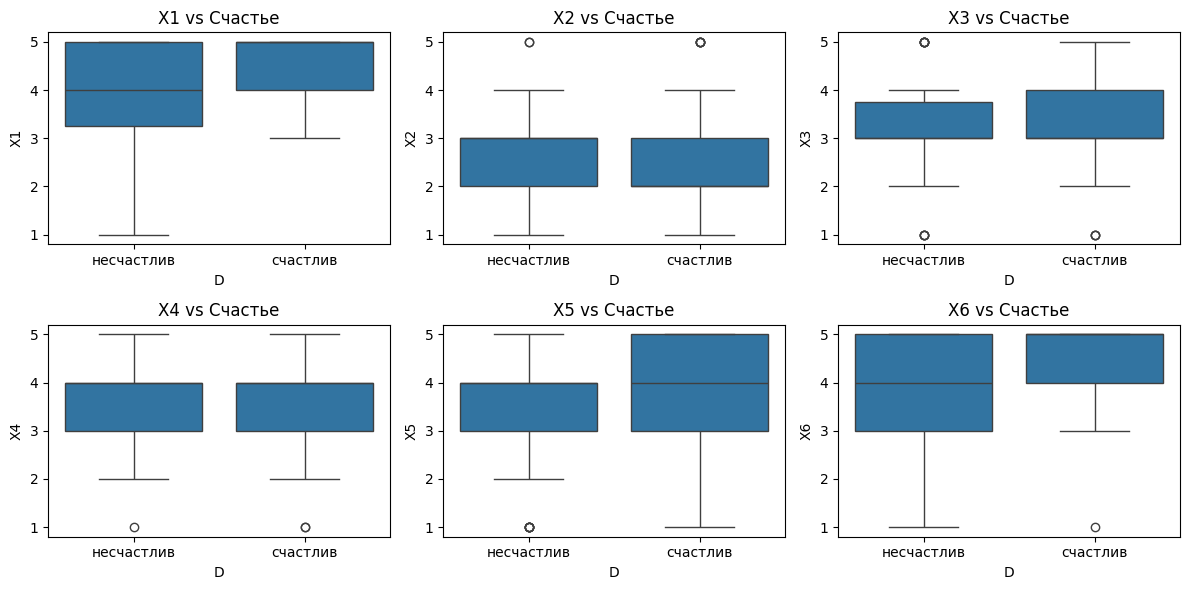

In [95]:
# Создаем копию данных с заменой D
data_renamed = data.copy()
data_renamed['D'] = data_renamed['D'].map({0: 'несчастлив', 1: 'счастлив'})

# Строим график
plt.figure(figsize=(12, 6))
for i, col in enumerate(['X1', 'X2', 'X3', 'X4', 'X5', 'X6']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='D', y=col, data=data_renamed)
    plt.title(f'{col} vs Состояние')
plt.tight_layout()
plt.show()

**5. Проверка значимости различий**

Проверим, есть ли статистически значимые различия в распределениях признаков для D=0 и D=1 (критерий Манна-Уитни для порядковых данных):

In [97]:
from scipy.stats import mannwhitneyu

for col in ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']:
    group_0 = data[data['D'] == 0][col]
    group_1 = data[data['D'] == 1][col]
    stat, p = mannwhitneyu(group_0, group_1)
    print(f"{col}: p-value = {p:.4f}")

# p-value < 0.05, различия значимы. Например:
# X1: p-value = 0.0001 → доступность информации о городских услугах важно.
# X6: p-value = 0.0075 → доступность мероприятий для местного сообщества имеет значение.

X1: p-value = 0.0001
X2: p-value = 0.9415
X3: p-value = 0.0331
X4: p-value = 0.1511
X5: p-value = 0.0125
X6: p-value = 0.0075


**6. Визуализации для EDA**

* Парные зависимости (PairPlot)

Ищем кластеры, выбросы, линейные/нелинейные зависимости.

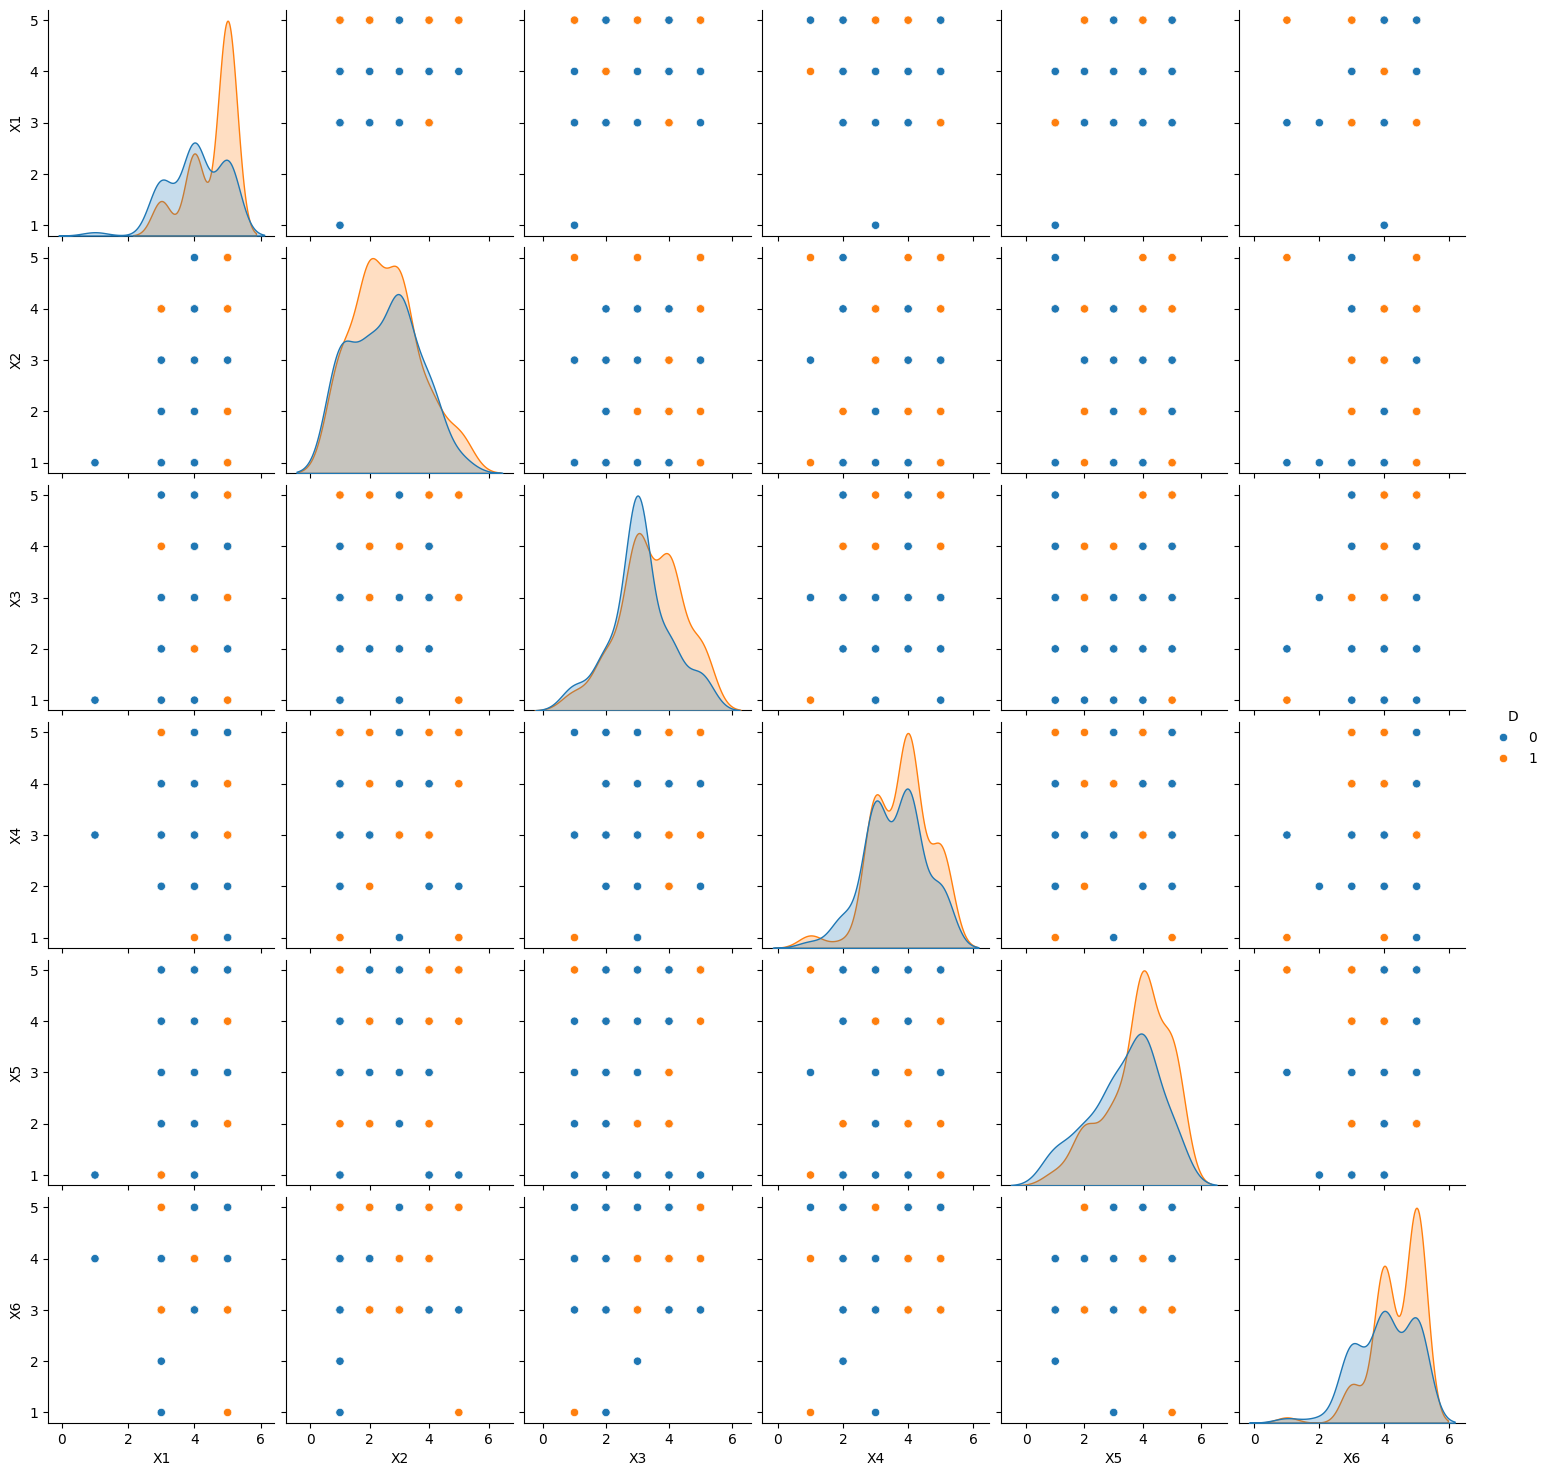

In [98]:
sns.pairplot(data, hue='D', diag_kind='kde')
plt.show()

* Violin Plot для сравнения распределений

Показывает ядра плотностей и квантили.

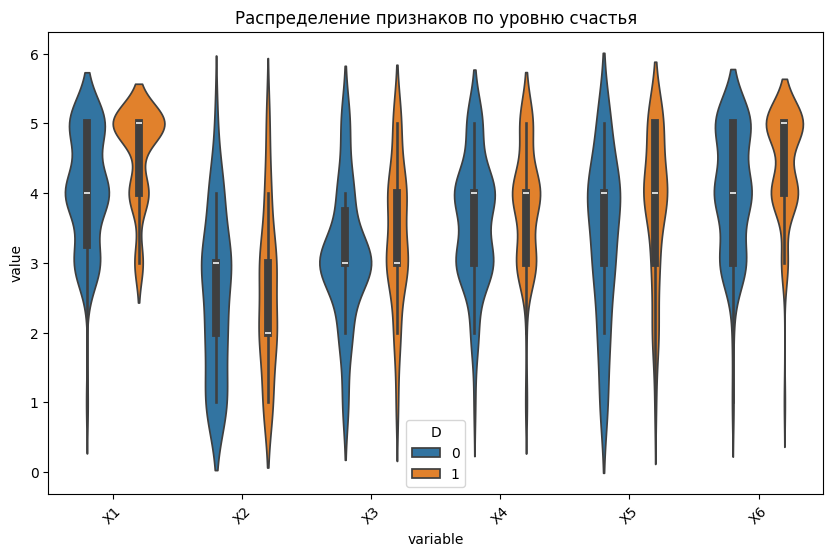

In [99]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='variable', y='value', hue='D',
               data=pd.melt(data, id_vars=['D']))
plt.title("Распределение признаков по уровню счастья")
plt.xticks(rotation=45)
plt.show()